In [1]:
from utils import *
%matplotlib notebook


In [56]:
i_start = 300
i_end = 400
mydict = load_data(300,900)
refVTK = mydict[i_start]
refVTK.GetLocations().shape[0]

100040

In [57]:
crop_data(mydict,
          min_x=-30, max_x=30,
          min_y=-30, max_y=30,
          min_z=0,max_z=30
         )
mydict[300].GetLocations().shape[0]

10479

In [149]:
data_mat = to_matrix(mydict,'Tracer')

In [150]:
data_mat.shape

(10479, 601)

In [151]:
K = np.corrcoef(data_mat)

In [152]:
data_df = pd.DataFrame(mydict[300].GetLocations(),columns=['X','Y','Z'])
data_df.head()

,X,Y,Z
0,-22.481554,14.520165,22.324532
1,-22.825829,17.819147,20.326878
2,-22.658052,14.507001,19.805262
3,-24.934950,15.301267,22.026121
4,-23.007210,17.020397,24.254026


In [196]:
def index_slices(data_df, direction='Z',rounded=0,):
    return data_df[[direction]].apply(lambda x : round(x,rounded)).groupby(direction).apply(lambda x: x.index.tolist()).to_dict()

    

In [197]:
idx_slices = index_slices(data_df,direction='Z')
idx_slices

{0.0: [71,
  120,
  121,
  123,
  124,
  125,
  126,
  153,
  154,
  155,
  157,
  220,
  221,
  222,
  240,
  241,
  243,
  254,
  255,
  257,
  273,
  274,
  276,
  289,
  297,
  324,
  325,
  327,
  343,
  344,
  368,
  379,
  380,
  381,
  384,
  386,
  387,
  392,
  403,
  404,
  423,
  424,
  426,
  434,
  435,
  436,
  451,
  454,
  455,
  456,
  477,
  499,
  500,
  506,
  507,
  509,
  525,
  598,
  599,
  600,
  632,
  648,
  649,
  651,
  652,
  661,
  663,
  700,
  702,
  727,
  728,
  729,
  779,
  780,
  782,
  783,
  787,
  788,
  790,
  809,
  819,
  820,
  821,
  823,
  824,
  825,
  830,
  831,
  832,
  833,
  857,
  862,
  863,
  864,
  902,
  903,
  908,
  909,
  910,
  919,
  920,
  922,
  941,
  943,
  944,
  968,
  969,
  997,
  998,
  999,
  1001,
  1002,
  1006,
  1031,
  1032,
  1068,
  1092,
  1097,
  1098,
  1106,
  1124,
  1145,
  1155,
  1156,
  1161,
  1178,
  1180,
  1181,
  1183,
  1184,
  1222,
  1224,
  1225,
  1226,
  1246,
  1247,
  1259,
  1269,
  

In [155]:
def plot_correlation_slice(main_point,idx_slices,slice2plot, other_dir):
    idx = idx_slices[slice2plot]
    plt.scatter(x=data_df.loc[idx, other_dir[0]],y=data_df.loc[idx, other_dir[1]],c=K[np.ix_([main_point],idx)].flatten())
    plt.colorbar()
    plt.scatter(x=data_df.loc[main_point, other_dir[0]],y=data_df.loc[main_point, other_dir[1]],c='r')


Main Point : 5547


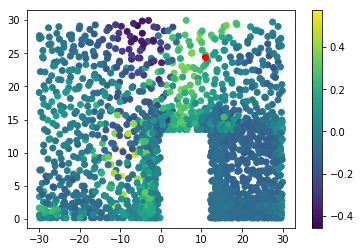

In [156]:
def plot_all_correlation_slice(data_df, direction='Z',rounded=0,main_point=None):
    all_dir = ['X','Y','Z']
    other_dir = np.setdiff1d(all_dir,[direction])
    idx_slices = index_slices(data_df,direction,rounded)
    
    slice2plot = 10.0
    
    if main_point == None : 
        main_point = np.random.choice(idx_slices[slice2plot])
    print('Main Point :', main_point)
    plot_correlation_slice(main_point, idx_slices, slice2plot, other_dir)
    
plot_all_correlation_slice(data_df, direction='Y',rounded=-1,main_point=5547)

In [113]:
eigenVal = np.linalg.eigvalsh(K+1e-10*np.eye(K.shape[0]))

KeyboardInterrupt: 

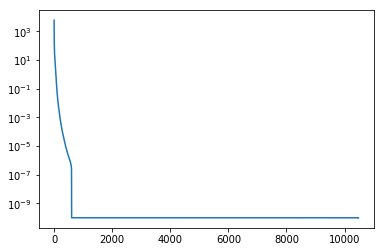

In [107]:
plt.semilogy(eigenVal[::-1]);
plt.semilogy(-1*(eigenVal[::-1]));

In [94]:
eigenVal[::-1][:10]

array([5962.28866742, 1270.41744982,  953.20156658,  681.01009274,
        417.39935538,  181.78106229,  147.79280252,  100.26615242,
         83.43350993,   72.69255918])

In [241]:
data_dict

NameError: name 'data_dict' is not defined

2

0.0